In [7]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.font_manager import FontProperties
from ast import literal_eval

import collections

Populating the interactive namespace from numpy and matplotlib


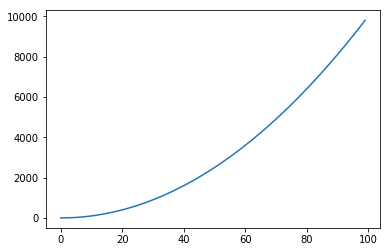

In [10]:
x = {x : x*x for x in range(100)}
plt.plot(x.keys(), x.values())
plt.show()

In [11]:
ref = 'hg38'
pro = 'SRP098789_human'

In [81]:
colors = [
    '#d3d3d3',
    '#e41a1c',
    '#377eb8',
    '#4daf4a',
    '#984ea3',
    '#ff7f00',
    '#ffff33',
    '#a65628',
    '#f781bf',
    '#999999']

In [19]:
roc = '/home/cmb-panasas2/wenzhenl/benchmark/exon_level/{}/{}/ROC_input.txt'.format(ref, pro)
ribotaper = '/home/cmb-panasas2/wenzhenl/benchmark/exon_level/{}/{}/results_ccds'.format(ref, pro)

In [21]:
taper_df = pd.read_table(ribotaper, header=0, index_col=0)

In [22]:
taper_df.head()

,strand.x,frame_start_pred,frame_end_pred,length.x,P_sites_sum,RNA_sites_sum,Ribocov_aver,RNAseqcov_aver,pctPhase_frame,pctPhase_frame_1,...,strand.y,length.y,reads_ribo,reads_multi_ribo,pct_region_covered_ribo,pct_covered_onlymulti_ribo,reads_rna,reads_multi_rna,pct_region_covered_rna,pct_covered_onlymulti_rna
exon_id,,,,,,,,,,,,,,,,,,,,,
chr1_100007033_100007156_CCDS_ENSG00000117620.13,+,0.0,2.0,123,11,29,6.463415,6.967480,0.636364,0.181818,...,+,123,52,0,1.000000,0.0,36,0,1.0,0.0
chr1_100011364_100011533_CCDS_ENSG00000117620.13,+,0.0,0.0,169,16,54,8.005917,8.905325,1.000000,0.000000,...,+,169,59,1,1.000000,0.0,54,0,1.0,0.0
chr1_100015301_100015420_CCDS_ENSG00000117620.13,+,2.0,2.0,119,13,25,8.336134,7.277311,0.076923,0.000000,...,+,119,41,0,0.941176,0.0,32,1,1.0,0.0
chr1_100017681_100017815_CCDS_ENSG00000117620.13,+,0.0,1.0,134,33,34,13.000000,6.895522,0.848485,0.030303,...,+,134,69,0,0.985075,0.0,38,2,1.0,0.0
chr1_100022385_100022411_CCDS_ENSG00000117620.13,+,1.0,0.0,26,9,3,12.346154,4.230769,0.000000,1.000000,...,+,26,26,0,1.000000,0.0,9,0,1.0,0.0


In [86]:
roc_df = pd.read_table(roc, header=0, index_col=0)

In [87]:
roc_df.head()

,ribotaper,chisq,ORFscore,ribocode,ribocop,truth
name,,,,,,
chr1_100007033_100007156_CCDS_ENSG00000117620.13_ribo,0.214465,1.315348e-01,2.471306,0.031153,0.625000,1
chr1_100007033_100007156_CCDS_ENSG00000117620.13_rna,0.510741,3.433635e-01,1.649814,0.097284,0.200308,0
chr1_100015301_100015420_CCDS_ENSG00000117620.13_ribo,0.008193,5.080526e-05,4.423682,0.005432,0.989617,1
chr1_100015301_100015420_CCDS_ENSG00000117620.13_rna,0.893366,7.557837e-01,0.641546,0.282253,0.188982,0
chr1_100017681_100017815_CCDS_ENSG00000117620.13_ribo,0.004388,2.257312e-09,5.351140,0.000540,0.596131,1


In [88]:
# ribotaper_cutoff = args[1]
ribotaper_cutoff = 0.05
# default 6.044
# ORFscore_cutoff = args[2]
ORFscore_cutoff = 6.044
# default 0.05
# ribocode_cutoff = args[3]
ribocode_cutoff = 0.05
#default 0.428571428571
# ribocop_cutoff = as.double(args[1])
ribocop_cutoff = 0.428571428571

In [126]:
totest = 'Ribocov_aver'
background = collections.Counter()
ribotaper = collections.Counter()
orfscore = collections.Counter()
ribocode = collections.Counter()
ribocop = collections.Counter()
for ix, row in roc_df.iterrows():
    if ix.endswith('_ribo'):
        background[taper_df.loc[ix[:ix.rfind('_')], totest]] += 1
        if row['ribotaper'] < ribotaper_cutoff:
            ribotaper[taper_df.loc[ix[:ix.rfind('_')], totest]] += 1
        if row['ORFscore'] > ORFscore_cutoff:
            orfscore[taper_df.loc[ix[:ix.rfind('_')], totest]] += 1
        if row['ribocode'] < ribocode_cutoff:
            ribocode[taper_df.loc[ix[:ix.rfind('_')], totest]] += 1
        if row['ribocop'] > ribocop_cutoff:
            ribocop[taper_df.loc[ix[:ix.rfind('_')], totest]] += 1

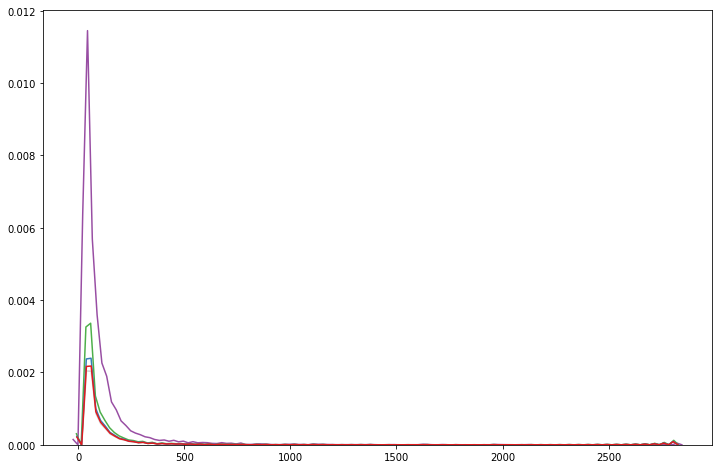

In [127]:
plot_background = []
for k, v in background.items():
    plot_background += [k] * v
plot_ribotaper = []
for k, v in ribotaper.items():
    plot_ribotaper += [k] * v
plot_orfscore = []
for k, v in orfscore.items():
    plot_orfscore += [k] * v
plot_ribocode = []
for k, v in ribocode.items():
    plot_ribocode += [k] * v
plot_ribocop = []
for k, v in ribocop.items():
    plot_ribocop += [k] *v
fig, ax = plt.subplots(figsize=(12,8))
nolog = True
if nolog == True:
    sns.distplot((plot_background), color=colors[0], kde=True, hist=False)
    sns.distplot((plot_orfscore), color=colors[4], kde=True, hist=False)
    sns.distplot((plot_ribotaper), color=colors[3], kde=True, hist=False)
    sns.distplot((plot_ribocode), color=colors[2], kde=True, hist=False)
    sns.distplot((plot_ribocop), color=colors[1], kde=True, hist=False)
else:
    sns.distplot(np.log10(plot_background), color=colors[0], kde=True, hist=False)
    sns.distplot(np.log10(plot_orfscore), color=colors[4], kde=True, hist=False)
    sns.distplot(np.log10(plot_ribotaper), color=colors[3], kde=True, hist=False)
    sns.distplot(np.log10(plot_ribocode), color=colors[2], kde=True, hist=False)
    sns.distplot(np.log10(plot_ribocop), color=colors[1], kde=True, hist=False)
pp = PdfPages('{}/{}_{}_dist.pdf'.format('results', pro, totest))
pp.savefig(fig)
pp.close()